<a href="https://colab.research.google.com/github/iamr7d/Auto_encoders/blob/main/Deep_Convolution_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Conv2D ,MaxPooling2D ,UpSampling2D ,Input

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

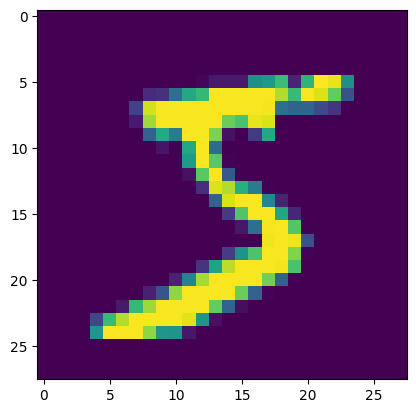

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

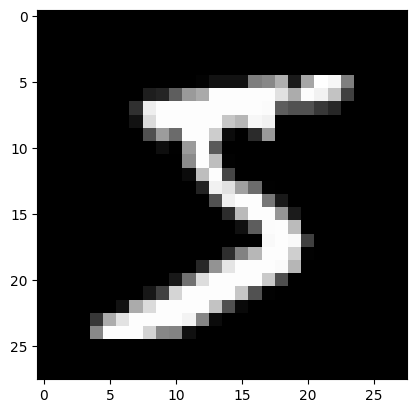

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap = 'gray') #cmap

In [ ]:
x_train = x_train /255.0
x_test = x_test /255.0

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

In [ ]:
x_train.shape

(60000, 28, 28, 1)

## **Model**

In [ ]:
input_layer = Input(shape = (28,28,1))

In [ ]:
#encoder
x = Conv2D(16,(3,3),activation = 'relu',padding = 'same')(input_layer)
x = MaxPooling2D((2,2),padding = 'same')(x)
x = Conv2D(8,(3,3),activation = 'relu',padding = 'same')(x)
x = MaxPooling2D((2,2),padding = 'same')(x)
x = Conv2D(8,(3,3),activation = 'relu',padding = 'same')(x)
encoded = MaxPooling2D((2,2),padding = 'same')(x)

In [ ]:
#decoder
x = Conv2D(8,(3,3),activation = 'relu',padding = 'same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8,(3,3),activation = 'relu',padding = 'same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16,(3,3),activation = 'relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3),activation = 'sigmoid',padding = 'same')(x)

In [ ]:
autoencoder = Model(input_layer,decoded)
autoencoder.compile(optimizer = 'adam',loss = 'binary_crossentropy')

In [ ]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.compile(optimizer = 'adam',loss = 'binary_crossentropy')

In [ ]:
history = autoencoder.fit(x_train,x_train,epochs = 50,batch_size = 256,shuffle = True,validation_data = (x_test,x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 87s 349ms/step - loss: 0.3965 - val_loss: 0.1690
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 132s 307ms/step - loss: 0.1592 - val_loss: 0.1391
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 79s 294ms/step - loss: 0.1363 - val_loss: 0.1279
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 291ms/step - loss: 0.1269 - val_loss: 0.1216
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 285ms/step - loss: 0.1216 - val_loss: 0.1178
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 284ms/step - loss: 0.1185 - val_loss: 0.1153
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 288ms/step - loss: 0.1160 - val_loss: 0.1134
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 291ms/step - loss: 0.1138 - val_loss: 0.1120
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 291ms/step - loss: 0.1128 - val_loss: 0.1116
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 288ms/step - loss: 0.1114 - val_loss: 0.1093
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 293ms/step - loss: 0.1099 - val_loss: 0.1083
Epoch 12/50
235/23

In [ ]:
encoder = Model(input_layer,encoded)
encoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 4, 4, 8)             │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,904 (7.44 KB)

 Trainable params: 1,904 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
decoder = Input